In [43]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [44]:
# CSV files
filtered_data = Path("Datasets/filtered_data.csv")
filtered_data_df = pd.read_csv(filtered_data)
filtered_data_df

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,"['Comedy', ' Drama', ' Romance']",PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,"['Animation', ' Action', ' Adventure']",PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
2,Transformers: Age of Extinction,5.9,7359,"['di Bonaventura Pictures', 'Tom DeSanto/Don M...",1104054072,2014.0,5.6,326960.0,245440000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
3,Transformers: The Last Knight,6.1,5548,"['Paramount', 'di Bonaventura Pictures', 'Ian ...",605425157,2017.0,5.2,164230.0,130170000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
4,Guardians of the Galaxy Vol. 2,7.6,19898,['Marvel Studios'],863756051,2017.0,7.6,736895.0,389810000.0,"['Action', ' Adventure', ' Comedy']",PG-13,['James Gunn']
...,...,...,...,...,...,...,...,...,...,...,...,...
1379,The Butler,7.3,2692,"['Follow Through Productions', 'Salamander Pic...",115922175,2013.0,7.2,118325.0,116630000.0,"['Biography', ' Drama']",PG-13,['Lee Daniels']
1380,High-Rise,5.7,1038,"['HanWay Films', 'SCOPE Pictures', 'Recorded P...",346472,2015.0,5.5,44402.0,340000.0,"['Drama', ' Sci-Fi']",R,['Ben Wheatley']
1381,The Birth of a Nation,6.1,468,['Epoch Film Co.'],11000000,2016.0,6.5,21628.0,15860000.0,"['Biography', ' Drama', ' History']",R,['Nate Parker']
1382,Little Boy,7.2,485,"['Santa Fé Films', 'Metanoia Films']",6485961,2015.0,7.3,23885.0,6420000.0,"['Drama', ' History', ' War']",PG-13,['Alejandro Monteverde']


In [45]:
#filter by above 7.0 for critical acclaim
critical_acclaim_df = filtered_data_df[filtered_data_df["Movie Rating"] >= 7]
critical_acclaim_df

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,"['Animation', ' Action', ' Adventure']",PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
4,Guardians of the Galaxy Vol. 2,7.6,19898,['Marvel Studios'],863756051,2017.0,7.6,736895.0,389810000.0,"['Action', ' Adventure', ' Comedy']",PG-13,['James Gunn']
5,Hidden Figures,8.1,8699,"['Fox 2000 Pictures', 'Levantine Films', 'Cher...",235956898,2016.0,7.8,246392.0,169610000.0,"['Biography', ' Drama', ' History']",PG,['Theodore Melfi']
6,Avengers: Infinity War,8.3,27040,['Marvel Studios'],2052415039,2018.0,8.4,1157990.0,678820000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,"['Anthony Russo', 'Joe Russo']"
9,Me Before You,7.9,11180,"['New Line Cinema', 'Sunswept Entertainment', ...",207945075,2016.0,7.4,275086.0,56250000.0,"['Drama', ' Romance']",PG-13,['Thea Sharrock']
...,...,...,...,...,...,...,...,...,...,...,...,...
1360,New World,7.4,383,"['Sanai Pictures', 'Peppermint&company', 'Daem...",0,2013.0,7.5,25560.0,460000.0,"['Action', ' Crime', ' Drama']",Not Rated,['Park Hoon-jung']
1369,August: Osage County,6.8,1348,"['Jean Doumanian Productions', 'Smoke House Pi...",74188937,2013.0,7.2,93857.0,37740000.0,"['Comedy', ' Drama']",R,['John Wells']
1370,Chasing Mavericks,7.0,498,"['Fox 2000 Pictures', 'Walden Media']",7900000,2012.0,7.1,34055.0,6000000.0,"['Biography', ' Drama', ' Sport']",PG,"['Michael Apted', 'Curtis Hanson']"
1379,The Butler,7.3,2692,"['Follow Through Productions', 'Salamander Pic...",115922175,2013.0,7.2,118325.0,116630000.0,"['Biography', ' Drama']",PG-13,['Lee Daniels']


In [46]:
audience_votecount_df = critical_acclaim_df.groupby(["Movie Rating", "Vote Average","Vote Count"]).max()

audience_votecount_df

Movie Name  \
Movie Rating Vote Average Vote Count                              
7.0          6.4          1030                         The Gift   
             6.5          11015                      Prometheus   
             6.6          1282              A Most Violent Year   
                          1514                  The Infiltrator   
                          2327        Tinker Tailor Soldier Spy   
...                                                         ...   
8.5          8.3          15780                The Intouchables   
             8.4          13542                        Whiplash   
             8.5          15865                        Parasite   
8.7          8.4          31585                    Interstellar   
8.8          8.4          33822                       Inception   

                                                                   Production Companies  \
Movie Rating Vote Average Vote Count                                                      
7.0          6.4          1030          ['Lakeshore Entertainment', 'Alphaville Films']   
             6.5          11015       ['Dune Entertainment', 'Scott Free Productions...   
             6.6          1282        ['Participant', 'Imagenation Abu Dhabi FZ', 'F...   
                          1514                                ['Good Films Collective']   
                          2327        ['StudioCanal', 'Kinowelt Filmproduktion', 'Ci...   
...                                                                                 ...   
8.5          8.3          15780       ['Gaumont', 'CinéCinéma', 'Quad Productions', ...   
             8.4          13542       ['Bold Films', 'Blumhouse Productions', 'Right...   
             8.5          15865                                        ['Barunson E&A']   
8.7          8.4          31585       ['Legendary Pictures', 'Syncopy', 'Lynda Obst ...   
8.8          8.4          33822       ['Legendary Pictures', 'Syncopy', 'Warner Bros...   

                                        Revenue  Year of Release      Votes  \
Movie Rating Vote Average Vote Count                                          
7.0          6.4          1030         12008642           2015.0   166856.0   
             6.5          11015       403354469           2012.0   629313.0   
             6.6          1282         12007070           2014.0    75985.0   
                          1514         21011110           2016.0    77162.0   
                          2327         80630608           2011.0   208835.0   
...                                         ...              ...        ...   
8.5          8.3          15780       426588510           2011.0   899776.0   
             8.4          13542        13092000           2014.0   934655.0   
             8.5          15865       257591776           2019.0   891514.0   
8.7          8.4          31585       701729206           2014.0  1995139.0   
8.8          8.4          33822       825532764           2010.0  2473068.0   

                                            Gross  \
Movie Rating Vote Average Vote Count                
7.0          6.4          1030         43770000.0   
             6.5          11015       126480000.0   
             6.6          1282          5740000.0   
                          1514         15430000.0   
                          2327         24150000.0   
...                                           ...   
8.5          8.3          15780        13180000.0   
             8.4          13542        13090000.0   
             8.5          15865        53370000.0   
8.7          8.4          31585       188020000.0   
8.8          8.4          33822       292580000.0   

                                                                     Genre  \
Movie Rating Vote Average Vote Count                                         
7.0          6.4          1030          ['Drama', ' Mystery', ' Thriller']   
             6.5          11015       ['Adven

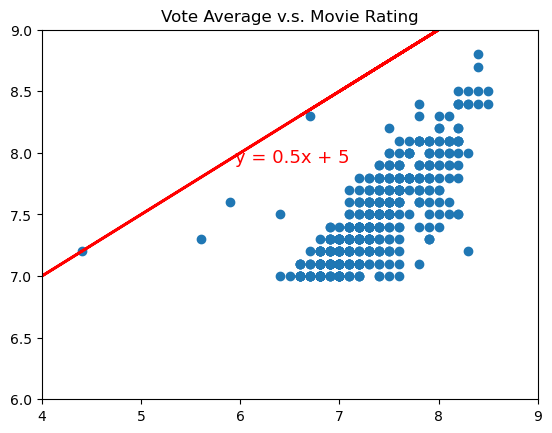

In [69]:
x = critical_acclaim_df["Vote Average"]
y = critical_acclaim_df["Movie Rating"]

slope = 0.5
intercept = 5

plt.scatter(x,y)

plt.plot(x, slope * x + intercept, color = "red", linewidth = 2)

line_eq="y = "+ str(round(slope,2))+ "x + " +str(round(intercept,2))

plt.annotate(line_eq,(max(x)*0.7,max(y)*0.9), fontsize=13,color="red")
                                 
plt.title("Vote Average v.s. Movie Rating")
plt.xlim(4,9)
plt.ylim(6,9)

plt.show()

In [65]:
rating_groups = critical_acclaim_df.groupby("Movie Rating")["Vote Average"].mean()

rating_groups

Movie Rating
7.0    6.881132
7.1    6.984127
7.2    7.068627
7.3    7.162712
7.4    7.300000
7.5    7.451220
7.6    7.235294
7.7    7.570000
7.8    7.660000
7.9    7.766667
8.0    7.852941
8.1    7.957143
8.2    7.980000
8.3    7.650000
8.4    8.237500
8.5    8.350000
8.7    8.400000
8.8    8.400000
Name: Vote Average, dtype: float64

In [49]:
correlation = critical_acclaim_df["Movie Rating"].corr(critical_acclaim_df["Vote Average"])

correlation

0.6121715960410723

In [50]:
rating_mean = critical_acclaim_df["Movie Rating"].mean()
vote_mean = critical_acclaim_df["Vote Average"].mean()

rating_data = critical_acclaim_df["Movie Rating"]
vote_data = critical_acclaim_df["Vote Average"]

stats.ttest_ind(rating_data, vote_data, equal_var=False)

TtestResult(statistic=4.653856389605447, pvalue=3.7820840635481125e-06, df=843.1777969421842)

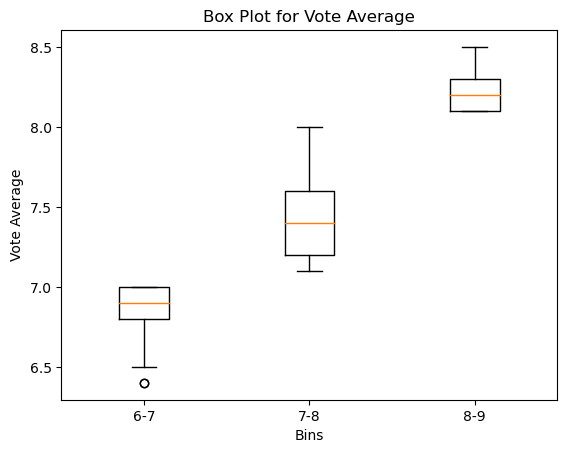

In [52]:
box_plot_df = critical_acclaim_df["Movie Rating"], critical_acclaim_df["Vote Average"]

bins = [6,7,8,9]
bin_labels = ["6-7", "7-8", "8-9"]

critical_acclaim_df.loc[:,"Vote Average Bin"] = pd.cut(critical_acclaim_df["Vote Average"], bins=bins, labels=bin_labels)

plt.boxplot(critical_acclaim_df.groupby("Vote Average Bin")["Vote Average"].apply(list), labels=bin_labels)
plt.title("Box Plot for Vote Average")
plt.xlabel("Bins")
plt.ylabel("Vote Average")

plt.show()

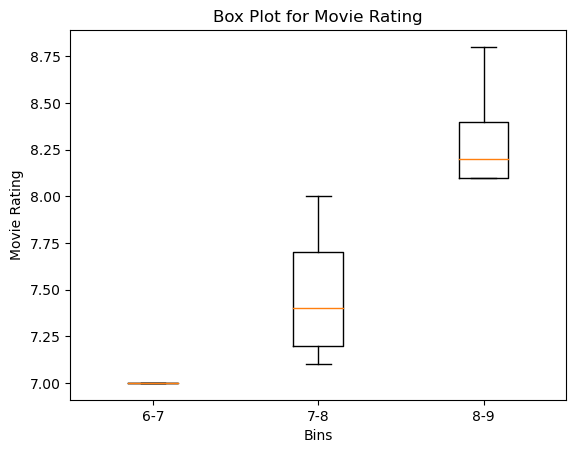

In [53]:
box_plot_df = critical_acclaim_df["Movie Rating"], critical_acclaim_df["Vote Average"]

bins = [6,7,8,9]
bin_labels = ["6-7", "7-8", "8-9"]

critical_acclaim_df.loc[:,"Movie Rating Bin"] = pd.cut(critical_acclaim_df["Movie Rating"], bins=bins, labels=bin_labels)
critical_acclaim_df.loc[:,"Vote Average Bin"] = pd.cut(critical_acclaim_df["Vote Average"], bins=bins, labels=bin_labels)


plt.boxplot(critical_acclaim_df.groupby("Movie Rating Bin")["Movie Rating"].apply(list), labels=bin_labels)
plt.title("Box Plot for Movie Rating")
plt.xlabel("Bins")
plt.ylabel("Movie Rating")

plt.show()

Text(0, 0.5, 'Movie Rating')

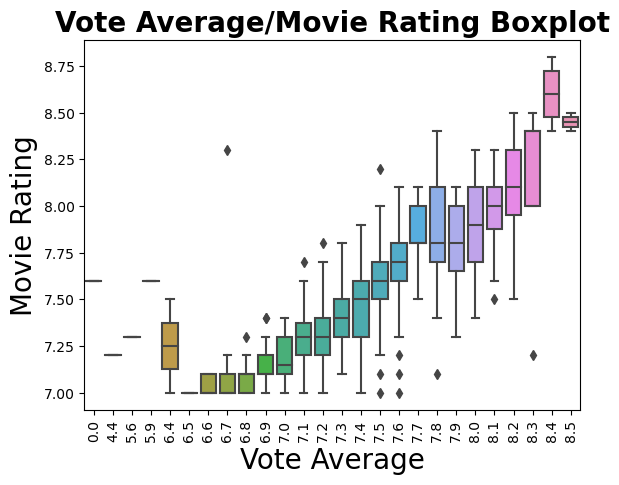

In [56]:
ax = sns.boxplot(x="Vote Average", y="Movie Rating", data= critical_acclaim_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Vote Average/Movie Rating Boxplot",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
# set x label and y label size and name
ax.set_xlabel("Vote Average",fontsize = 20, )
ax.set_ylabel("Movie Rating",fontsize = 20 )